### training and implementing a linear regression algo using gradient descent.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class GD_LR:
    '''
    we cant initialise the bias matrix 'theta' at the time of creation of the GD_LR object, as we are not aware of the
    size of the dataset right now.
    
    this is a class which implements linear regression using batch gradient descent for more than 1 input parameters
    '''
    
    def train(self, X_train, Y_train):
        #converting the data sets to numpy arrays
        X_train=np.array(X_train, dtype=float)
        data_points, num_parameter=X_train.shape #(m,n)
        X_train=np.insert(X_train, num_parameter,1,axis=1)#inserts a 1s column to the numpy array
        Y_train=np.array(Y_train, dtype=float)
        
        self.bias_matrix=np.zeros(num_parameter+1)# 'theta'
        alpha=.1 #learning rate
        tolerence=.1 #value of the norm of the gradient of the cost function
        
        grad_vctr=(np.matmul(np.transpose(X_train), (np.matmul(X_train,self.bias_matrix)-Y_train)))/data_points
        norm_grad=np.sum(grad_vctr**2)
        while (norm_grad>=tolerence):
            self.bias_matrix=self.bias_matrix-alpha*grad_vctr
            grad_vctr=(np.matmul(np.transpose(X_train), (np.matmul(X_train,self.bias_matrix)-Y_train)))/data_points
            norm_grad=np.sum(grad_vctr**2)
        
    def predict(self, X_test):
        #arr1: the testing data/ data for which values have to be predicted
        X_test=np.array(X_test, dtype=float)
        data_points, num_parameter=X_test.shape #(m,n)
        X_test=np.insert(X_test, num_parameter, 1,axis=1)
        num_predicted=np.matmul(X_test, self.bias_matrix)
        return num_predicted
    
    def score(self, arr1, arr2):
        #arr1: data for which target values are given by arr2
        #we will first predict the target values for arr1 and then compare them with the values in arr2
        num_target=np.array(arr2, dtype=float)
        num_input=np.array(arr1, dtype=float)
        
        num_predicted=self.predict(num_input)
        mean=np.mean(num_target)
        numerator=np.sum((num_predicted-num_target)**2)
        denominator=np.sum((mean-num_target)**2)
        COD=1-(numerator/denominator)
        return COD
             

In [4]:
'''
gradient descent for datasets with 1 input parameter
'''

#creating a random dataset
X = 2 * np.random.rand(100, 1)#the input parameter
Y = 4 + 3 * X + np.random.randn(100, 1)

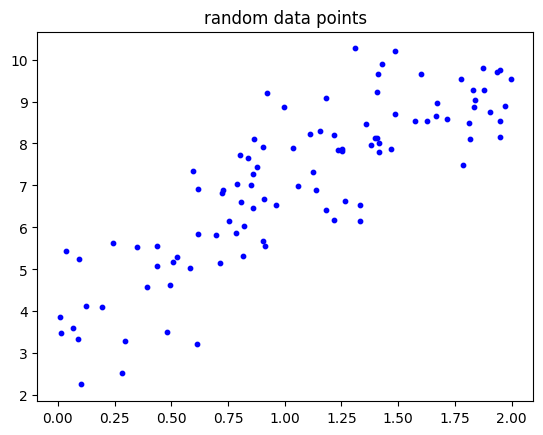

In [5]:
plt.scatter(X,Y,s=10, c='b')
plt.title("random data points")
plt.show()

8
3.1983294380114273 3.201528583043344


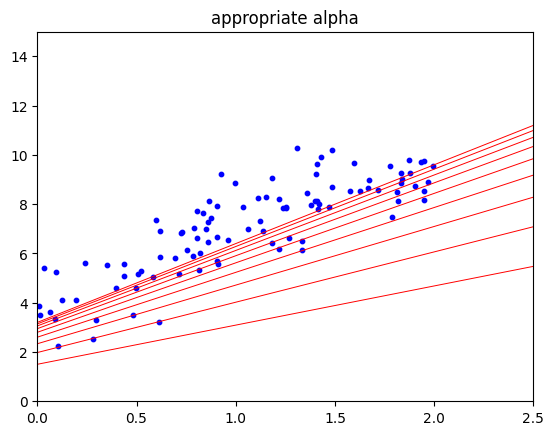

In [6]:
#training the algorithm
alpha=.1
tolerence =.5
#initialising LR coeff
m=1
c=1
slope_m=(np.sum((X*m+c-Y)*X))/100
slope_c=(np.sum((X*m+c-Y)))/100
norm=slope_m**2 + slope_c **2
plt.scatter(X,Y,s=10, c='b')
plt.axis([0,2.5,0,15])
plt.title("appropriate alpha")
x=np.arange(0,16,.05,dtype=float)
for i in range(2000):
    temp_m=m-(alpha)*(slope_m)
    temp_c=m-(alpha)*(slope_c)
    m=temp_m
    c=temp_c
    slope_m=(np.sum((X*m+c-Y)*X))/100
    slope_c=(np.sum((X*m+c-Y)))/100
    norm=slope_m**2 + slope_c **2
    y=m*x + c
    plt.plot(x,y,color='red', linewidth=.7)
    if(norm<=tolerence):
        break
print(i)
print(m,c)
plt.show()

60


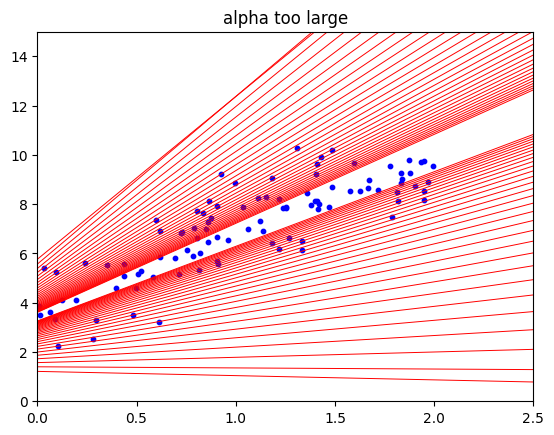

In [7]:
#training the algorithm
alpha=.95
tolerence=.5
#initialising LR coeff
m=1
c=1
slope_m=(np.sum((X*m+c-Y)*X))/100
slope_c=(np.sum((X*m+c-Y)))/100
norm=slope_m**2 + slope_c **2
plt.scatter(X,Y,s=10, c='b')
plt.axis([0,2.5,0,15])
plt.title("alpha too large")
x=np.arange(0,16,.05,dtype=float)
for i in range(2000):
    temp_m=m-(alpha)*(slope_m)
    temp_c=m-(alpha)*(slope_c)
    m=temp_m
    c=temp_c
    slope_m=(np.sum((X*m+c-Y)*X))/100
    slope_c=(np.sum((X*m+c-Y)))/100
    norm=slope_m**2 + slope_c **2
    y=m*x + c
    plt.plot(x,y,color='red', linewidth=.7)
    if(norm<=tolerence):
        break
print(i)
plt.show()

100


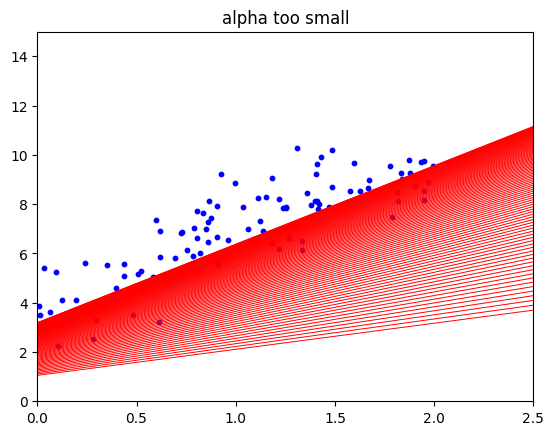

In [8]:
#training the algorithm
alpha=.01
tolerence=.5
#initialising LR coeff
m=1
c=1
slope_m=(np.sum((X*m+c-Y)*X))/100
slope_c=(np.sum((X*m+c-Y)))/100
norm=slope_m**2 + slope_c **2
plt.scatter(X,Y,s=10, c='b')
plt.axis([0,2.5,0,15])
plt.title("alpha too small")
x=np.arange(0,16,.05,dtype=float)
for i in range(2000):
    temp_m=m-(alpha)*(slope_m)
    temp_c=m-(alpha)*(slope_c)
    m=temp_m
    c=temp_c
    slope_m=(np.sum((X*m+c-Y)*X))/100
    slope_c=(np.sum((X*m+c-Y)))/100
    norm=slope_m**2 + slope_c **2
    y=m*x + c
    plt.plot(x,y,color='red', linewidth=.7)
    if(norm<=tolerence):
        break
print(i)
plt.show()